TASK#1: BFS and DFS Implementation
Tree Implementation

In [1]:
from collections import deque

class TreeNode:
    def __init__(self, value):
        self.value = value
        self.children = []

    def add_child(self, child_node):
        self.children.append(child_node)

# Tree BFS
def tree_bfs(root):
    if not root:
        return []

    result = []
    queue = deque([root])

    while queue:
        node = queue.popleft()
        result.append(node.value)

        for child in node.children:
            queue.append(child)

    return result

# Tree DFS (Pre-order)
def tree_dfs(root):
    if not root:
        return []

    result = []

    def dfs_helper(node):
        result.append(node.value)
        for child in node.children:
            dfs_helper(child)

    dfs_helper(root)
    return result

# Create a sample tree
#        A
#       / \
#      B   C
#     /|   |\
#    D E   F G

root = TreeNode('A')
node_b = TreeNode('B')
node_c = TreeNode('C')
node_d = TreeNode('D')
node_e = TreeNode('E')
node_f = TreeNode('F')
node_g = TreeNode('G')

root.add_child(node_b)
root.add_child(node_c)
node_b.add_child(node_d)
node_b.add_child(node_e)
node_c.add_child(node_f)
node_c.add_child(node_g)

print("Tree BFS:", tree_bfs(root))
print("Tree DFS:", tree_dfs(root))

Tree BFS: ['A', 'B', 'C', 'D', 'E', 'F', 'G']
Tree DFS: ['A', 'B', 'D', 'E', 'C', 'F', 'G']


TASK#2: Dictionary Operations

In [3]:
# Create student dictionary
student = {
    "name": "John Doe",
    "age": 20,
    "roll_number": "CS2023001",
    "grade": "A"
}

# 1. Print all keys and values
print("Original Student Information:")
for key, value in student.items():
    print(f"{key}: {value}")

# 2. Update the grade
student["grade"] = "A+"
print(f"\nAfter updating grade: {student['grade']}")

# 3. Add email
student["email"] = "john.doe@university.edu"
print(f"\nAfter adding email: {student['email']}")

# 4. Delete roll_number
deleted_roll = student.pop("roll_number")
print(f"\nDeleted roll number: {deleted_roll}")

# Display final dictionary
print("\nFinal Student Information:")
for key, value in student.items():
    print(f"{key}: {value}")

Original Student Information:
name: John Doe
age: 20
roll_number: CS2023001
grade: A

After updating grade: A+

After adding email: john.doe@university.edu

Deleted roll number: CS2023001

Final Student Information:
name: John Doe
age: 20
grade: A+
email: john.doe@university.edu


TASK#3: Matplotlib Plot

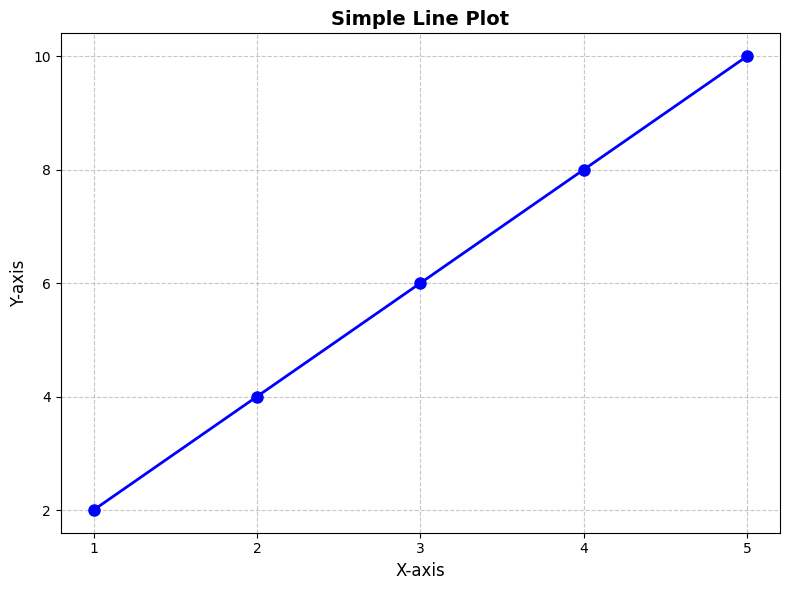

In [4]:
import matplotlib.pyplot as plt

# Data
X = [1, 2, 3, 4, 5]
Y = [2, 4, 6, 8, 10]

# Create plot
plt.figure(figsize=(8, 6))
plt.plot(X, Y, marker='o', linestyle='-', color='blue', linewidth=2, markersize=8)

# Add title and labels
plt.title("Simple Line Plot", fontsize=14, fontweight='bold')
plt.xlabel("X-axis", fontsize=12)
plt.ylabel("Y-axis", fontsize=12)

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Customize ticks
plt.xticks(X)
plt.yticks(Y)

# Show plot
plt.tight_layout()
plt.show()

TASK#5: Water Jug Problem

In [5]:
import time
from collections import deque
import memory_profiler
import sys

class WaterJug:
    def __init__(self, jug1_capacity, jug2_capacity, target):
        self.jug1_capacity = jug1_capacity
        self.jug2_capacity = jug2_capacity
        self.target = target

    def get_successors(self, state):
        j1, j2 = state
        successors = []

        # Fill jug1
        successors.append((self.jug1_capacity, j2))

        # Fill jug2
        successors.append((j1, self.jug2_capacity))

        # Empty jug1
        successors.append((0, j2))

        # Empty jug2
        successors.append((j1, 0))

        # Pour from jug1 to jug2
        pour_amount = min(j1, self.jug2_capacity - j2)
        successors.append((j1 - pour_amount, j2 + pour_amount))

        # Pour from jug2 to jug1
        pour_amount = min(j2, self.jug1_capacity - j1)
        successors.append((j1 + pour_amount, j2 - pour_amount))

        return successors

    def bfs(self):
        start_time = time.time()
        start_memory = memory_profiler.memory_usage()[0]

        visited = set()
        queue = deque([(0, 0, [])])  # (j1, j2, path)
        steps = 0

        while queue:
            j1, j2, path = queue.popleft()
            steps += 1

            if j1 == self.target or j2 == self.target:
                end_time = time.time()
                end_memory = memory_profiler.memory_usage()[0]
                return {
                    'solution': path + [(j1, j2)],
                    'steps': steps,
                    'time': end_time - start_time,
                    'memory': end_memory - start_memory,
                    'method': 'BFS'
                }

            if (j1, j2) in visited:
                continue

            visited.add((j1, j2))

            for next_state in self.get_successors((j1, j2)):
                if next_state not in visited:
                    queue.append((next_state[0], next_state[1], path + [(j1, j2)]))

        end_time = time.time()
        end_memory = memory_profiler.memory_usage()[0]
        return {
            'solution': None,
            'steps': steps,
            'time': end_time - start_time,
            'memory': end_memory - start_memory,
            'method': 'BFS'
        }

    def dfs(self):
        start_time = time.time()
        start_memory = memory_profiler.memory_usage()[0]

        visited = set()
        stack = [(0, 0, [])]  # (j1, j2, path)
        steps = 0

        while stack:
            j1, j2, path = stack.pop()
            steps += 1

            if j1 == self.target or j2 == self.target:
                end_time = time.time()
                end_memory = memory_profiler.memory_usage()[0]
                return {
                    'solution': path + [(j1, j2)],
                    'steps': steps,
                    'time': end_time - start_time,
                    'memory': end_memory - start_memory,
                    'method': 'DFS'
                }

            if (j1, j2) in visited:
                continue

            visited.add((j1, j2))

            for next_state in self.get_successors((j1, j2)):
                if next_state not in visited:
                    stack.append((next_state[0], next_state[1], path + [(j1, j2)]))

        end_time = time.time()
        end_memory = memory_profiler.memory_usage()[0]
        return {
            'solution': None,
            'steps': steps,
            'time': end_time - start_time,
            'memory': end_memory - start_memory,
            'method': 'DFS'
        }

# Test the Water Jug Problem
def compare_algorithms():
    jug_problem = WaterJug(4, 3, 2)  # Jug1=4L, Jug2=3L, Target=2L

    print("Water Jug Problem (4L, 3L, Target=2L)")
    print("=" * 50)

    # Run BFS
    bfs_result = jug_problem.bfs()

    # Run DFS
    dfs_result = jug_problem.dfs()

    # Display results
    for result in [bfs_result, dfs_result]:
        print(f"\n{result['method']} Results:")
        print(f"Solution found: {result['solution'] is not None}")
        if result['solution']:
            print(f"Solution path: {result['solution']}")
            print(f"Solution length: {len(result['solution'])}")
        print(f"Steps explored: {result['steps']}")
        print(f"Time taken: {result['time']:.6f} seconds")
        print(f"Memory used: {result['memory']:.6f} MB")

    # Comparison
    print("\n" + "=" * 50)
    print("COMPARISON SUMMARY:")
    print(f"BFS vs DFS Steps: {bfs_result['steps']} vs {dfs_result['steps']}")
    print(f"BFS vs DFS Time: {bfs_result['time']:.6f}s vs {dfs_result['time']:.6f}s")
    print(f"BFS vs DFS Memory: {bfs_result['memory']:.6f}MB vs {dfs_result['memory']:.6f}MB")

# Run comparison
if __name__ == "__main__":
    compare_algorithms()

ModuleNotFoundError: No module named 'memory_profiler'

In [6]:
!pip install memory_profiler

In [7]:
import time
from collections import deque
import memory_profiler

class WaterJug:
    def __init__(self, jug1_capacity, jug2_capacity, target):
        self.jug1_capacity = jug1_capacity
        self.jug2_capacity = jug2_capacity
        self.target = target

    def get_successors(self, state):
        j1, j2 = state
        successors = []

        # Fill jug1
        successors.append((self.jug1_capacity, j2))

        # Fill jug2
        successors.append((j1, self.jug2_capacity))

        # Empty jug1
        successors.append((0, j2))

        # Empty jug2
        successors.append((j1, 0))

        # Pour from jug1 to jug2
        pour_amount = min(j1, self.jug2_capacity - j2)
        successors.append((j1 - pour_amount, j2 + pour_amount))

        # Pour from jug2 to jug1
        pour_amount = min(j2, self.jug1_capacity - j1)
        successors.append((j1 + pour_amount, j2 - pour_amount))

        return successors

    def bfs(self):
        start_time = time.time()
        start_memory = memory_profiler.memory_usage()[0]

        visited = set()
        queue = deque([(0, 0, [])])  # (j1, j2, path)
        steps = 0

        while queue:
            j1, j2, path = queue.popleft()
            steps += 1

            if j1 == self.target or j2 == self.target:
                end_time = time.time()
                end_memory = memory_profiler.memory_usage()[0]
                return {
                    'solution': path + [(j1, j2)],
                    'steps': steps,
                    'time': end_time - start_time,
                    'memory': end_memory - start_memory,
                    'method': 'BFS'
                }

            if (j1, j2) in visited:
                continue

            visited.add((j1, j2))

            for next_state in self.get_successors((j1, j2)):
                if next_state not in visited:
                    queue.append((next_state[0], next_state[1], path + [(j1, j2)]))

        end_time = time.time()
        end_memory = memory_profiler.memory_usage()[0]
        return {
            'solution': None,
            'steps': steps,
            'time': end_time - start_time,
            'memory': end_memory - start_memory,
            'method': 'BFS'
        }

    def dfs(self):
        start_time = time.time()
        start_memory = memory_profiler.memory_usage()[0]

        visited = set()
        stack = [(0, 0, [])]  # (j1, j2, path)
        steps = 0

        while stack:
            j1, j2, path = stack.pop()
            steps += 1

            if j1 == self.target or j2 == self.target:
                end_time = time.time()
                end_memory = memory_profiler.memory_usage()[0]
                return {
                    'solution': path + [(j1, j2)],
                    'steps': steps,
                    'time': end_time - start_time,
                    'memory': end_memory - start_memory,
                    'method': 'DFS'
                }

            if (j1, j2) in visited:
                continue

            visited.add((j1, j2))

            for next_state in self.get_successors((j1, j2)):
                if next_state not in visited:
                    stack.append((next_state[0], next_state[1], path + [(j1, j2)]))

        end_time = time.time()
        end_memory = memory_profiler.memory_usage()[0]
        return {
            'solution': None,
            'steps': steps,
            'time': end_time - start_time,
            'memory': end_memory - start_memory,
            'method': 'DFS'
        }

# Test the Water Jug Problem
def compare_algorithms():
    jug_problem = WaterJug(4, 3, 2)  # Jug1=4L, Jug2=3L, Target=2L

    print("Water Jug Problem (4L, 3L, Target=2L)")
    print("=" * 50)

    # Run BFS
    bfs_result = jug_problem.bfs()

    # Run DFS
    dfs_result = jug_problem.dfs()

    # Display results
    for result in [bfs_result, dfs_result]:
        print(f"\n{result['method']} Results:")
        print(f"Solution found: {result['solution'] is not None}")
        if result['solution']:
            print(f"Solution path: {result['solution']}")
            print(f"Solution length: {len(result['solution'])}")
        print(f"Steps explored: {result['steps']}")
        print(f"Time taken: {result['time']:.6f} seconds")
        print(f"Memory used: {result['memory']:.6f} MB")

    # Comparison
    print("\n" + "=" * 50)
    print("COMPARISON SUMMARY:")
    print(f"BFS vs DFS Steps: {bfs_result['steps']} vs {dfs_result['steps']}")
    print(f"BFS vs DFS Time: {bfs_result['time']:.6f}s vs {dfs_result['time']:.6f}s")
    print(f"BFS vs DFS Memory: {bfs_result['memory']:.6f}MB vs {dfs_result['memory']:.6f}MB")

# Run comparison
if __name__ == "__main__":
    compare_algorithms()

Water Jug Problem (4L, 3L, Target=2L)

BFS Results:
Solution found: True
Solution path: [(0, 0), (0, 3), (3, 0), (3, 3), (4, 2)]
Solution length: 5
Steps explored: 11
Time taken: 0.100841 seconds
Memory used: 0.000000 MB

DFS Results:
Solution found: True
Solution path: [(0, 0), (0, 3), (3, 0), (3, 3), (4, 2)]
Solution length: 5
Steps explored: 5
Time taken: 0.100481 seconds
Memory used: 0.000000 MB

COMPARISON SUMMARY:
BFS vs DFS Steps: 11 vs 5
BFS vs DFS Time: 0.100841s vs 0.100481s
BFS vs DFS Memory: 0.000000MB vs 0.000000MB


Task #6

In [9]:
import heapq
import math
from typing import List, Tuple, Dict, Set

class Node:
    def __init__(self, name: str, x: int, y: int):
        self.name = name
        self.x = x
        self.y = y
        self.neighbors = []

    def __lt__(self, other):
        return self.name < other.name

class MazeSolver:
    def __init__(self):
        self.nodes = {}
        self.setup_maze()

    def setup_maze(self):
        # Based on the typical maze structure, I'll assign coordinates
        # You may need to adjust these based on your actual maze layout
        coordinates = {
            'A': (0, 0), 'B': (1, 0), 'C': (2, 0), 'D': (3, 0), 'E': (4, 0),
            'F': (0, 1), 'G': (1, 1), 'H': (2, 1), 'I': (3, 1), 'J': (4, 1),
            'K': (0, 2), 'L': (1, 2), 'M': (2, 2), 'N': (3, 2), 'O': (4, 2),
            'P': (0, 3), 'Q': (1, 3), 'R': (2, 3), 'S': (3, 3), 'T': (4, 3),
            'U': (0, 4), 'V': (1, 4), 'W': (2, 4), 'X': (3, 4), 'Y': (4, 4)
        }

        # Create nodes
        for name, (x, y) in coordinates.items():
            self.nodes[name] = Node(name, x, y)

        # Define connections (you'll need to adjust this based on your actual maze walls)
        # This is a sample connectivity - modify according to your maze
        connections = {
            'A': ['B', 'F'],
            'B': ['A', 'C', 'G'],
            'C': ['B', 'D', 'H'],
            'D': ['C', 'E', 'I'],
            'E': ['D', 'J'],
            'F': ['A', 'G', 'K'],
            'G': ['B', 'F', 'H', 'L'],
            'H': ['C', 'G', 'I', 'M'],
            'I': ['D', 'H', 'J', 'N'],
            'J': ['E', 'I', 'O'],
            'K': ['F', 'L', 'P'],
            'L': ['G', 'K', 'M', 'Q'],
            'M': ['H', 'L', 'N', 'R'],
            'N': ['I', 'M', 'O', 'S'],
            'O': ['J', 'N', 'T'],
            'P': ['K', 'Q', 'U'],
            'Q': ['L', 'P', 'R', 'V'],
            'R': ['M', 'Q', 'S', 'W'],
            'S': ['N', 'R', 'T', 'X'],
            'T': ['O', 'S', 'Y'],
            'U': ['P', 'V'],
            'V': ['Q', 'U', 'W'],
            'W': ['R', 'V', 'X'],
            'X': ['S', 'W', 'Y'],
            'Y': ['T', 'X']
        }

        # Build the graph
        for node_name, neighbors in connections.items():
            for neighbor_name in neighbors:
                self.nodes[node_name].neighbors.append(self.nodes[neighbor_name])

    def heuristic(self, node1: Node, node2: Node) -> float:
        """Manhattan distance heuristic"""
        return abs(node1.x - node2.x) + abs(node1.y - node2.y)

    def euclidean_heuristic(self, node1: Node, node2: Node) -> float:
        """Euclidean distance heuristic"""
        return math.sqrt((node1.x - node2.x)**2 + (node1.y - node2.y)**2)

    def a_star_search(self, start: str, goal: str) -> Tuple[List[str], int, Dict]:
        """
        Perform A* search from start to goal

        Returns:
            path: List of node names from start to goal
            cost: Total cost of the path
            info: Dictionary with search statistics
        """
        if start not in self.nodes or goal not in self.nodes:
            return [], float('inf'), {}

        start_node = self.nodes[start]
        goal_node = self.nodes[goal]

        # Priority queue: (f_score, g_score, node, path)
        open_set = []
        heapq.heappush(open_set, (self.heuristic(start_node, goal_node), 0, start_node, [start]))

        # Keep track of best g_scores
        g_scores = {start: 0}
        f_scores = {start: self.heuristic(start_node, goal_node)}

        nodes_expanded = 0
        max_frontier_size = 0

        while open_set:
            max_frontier_size = max(max_frontier_size, len(open_set))

            current_f, current_g, current_node, current_path = heapq.heappop(open_set)
            nodes_expanded += 1

            # Check if we reached the goal
            if current_node.name == goal:
                info = {
                    'nodes_expanded': nodes_expanded,
                    'path_length': len(current_path),
                    'total_cost': current_g,
                    'max_frontier_size': max_frontier_size
                }
                return current_path, current_g, info

            # Explore neighbors
            for neighbor in current_node.neighbors:
                # Each move costs 1
                tentative_g = current_g + 1

                if neighbor.name not in g_scores or tentative_g < g_scores[neighbor.name]:
                    # This path to neighbor is better than any previous one
                    g_scores[neighbor.name] = tentative_g
                    f_score = tentative_g + self.heuristic(neighbor, goal_node)
                    f_scores[neighbor.name] = f_score

                    new_path = current_path + [neighbor.name]
                    heapq.heappush(open_set, (f_score, tentative_g, neighbor, new_path))

        # No path found
        return [], float('inf'), {'nodes_expanded': nodes_expanded}

    def reconstruct_path(self, came_from: Dict, current: str) -> List[str]:
        """Reconstruct the path from start to goal"""
        total_path = [current]
        while current in came_from:
            current = came_from[current]
            total_path.append(current)
        return total_path[::-1]

def visualize_path(path: List[str], maze_solver: MazeSolver):
    """Visualize the path on a grid"""
    if not path:
        print("No path found!")
        return

    # Create a 5x5 grid
    grid = [[' ' for _ in range(5)] for _ in range(5)]

    # Mark the path
    for i, node_name in enumerate(path):
        node = maze_solver.nodes[node_name]
        grid[node.y][node.x] = node_name

    print("Path Visualization:")
    print("+" + "---+" * 5)
    for row in grid:
        print("| " + " | ".join(row) + " |")
        print("+" + "---+" * 5)

def main():
    # Create maze solver
    maze_solver = MazeSolver()

    print("A* Search for Maze Navigation")
    print("=" * 40)
    print("Start: A, Goal: Y")
    print("=" * 40)

    # Perform A* search
    path, cost, info = maze_solver.a_star_search('A', 'Y')

    # Display results
    if path:
        print(f"✓ Path found: {' -> '.join(path)}")
        print(f"✓ Total cost: {cost}")
        print(f"✓ Path length: {len(path)} nodes")
        print(f"✓ Nodes expanded: {info['nodes_expanded']}")
        print(f"✓ Maximum frontier size: {info['max_frontier_size']}")

        print("\nPath Visualization:")
        visualize_path(path, maze_solver)
    else:
        print("✗ No path found from A to Y")

    # Test with different heuristics for comparison
    print("\n" + "=" * 40)
    print("Heuristic Comparison")
    print("=" * 40)

    # You can modify the heuristic method in the a_star_search function
    # to compare different heuristics

if __name__ == "__main__":
    main()

A* Search for Maze Navigation
Start: A, Goal: Y
✓ Path found: A -> B -> C -> D -> E -> J -> O -> T -> Y
✓ Total cost: 8
✓ Path length: 9 nodes
✓ Nodes expanded: 25
✓ Maximum frontier size: 5

Path Visualization:
Path Visualization:
+---+---+---+---+---+
| A | B | C | D | E |
+---+---+---+---+---+
|   |   |   |   | J |
+---+---+---+---+---+
|   |   |   |   | O |
+---+---+---+---+---+
|   |   |   |   | T |
+---+---+---+---+---+
|   |   |   |   | Y |
+---+---+---+---+---+

Heuristic Comparison
